# ECE 57000 Assignment 4 Exercise

Your Name:

## Exercise 0: Train your model on GPU (0 points)

For some tasks in this assignment, it can take a long time if you run it on CPU. For example, based on our test on Exercise 3 Task 4, it will take roughly 2 hours to train the full model for 1 epoch on CPU. Hence, we highly recommend you try to train your model on GPU.

To do so, first you need to enable GPU on Colab (this will restart the runtime). Click `Runtime`-> `Change runtime type` and select the `Hardware accelerator` there.  You can then run the following code to see if the GPU is correctly initialized and available.



In [1]:
import torch
print(f'Can I can use GPU now? -- {torch.cuda.is_available()}')

Can I can use GPU now? -- True


In [2]:
print(torch.cuda.get_device_name(0))

NVIDIA GeForce GTX 1060 with Max-Q Design


### You must manually move your model and data to the GPU (and sometimes back to the cpu)
After setting the GPU up on colab, then you should put your **model** and **data** to GPU. We give a simple example below. You can use `to` function for this task. See [torch.Tensor.to](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html) to move a tensor to the GPU (probably your mini-batch of data in each iteration) or [torch.nn.Module.to](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.to) to move your NN model to GPU (assuming you create subclass [torch.nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html)). Note that `to()` of tensor returns a NEW tensor while `to` of a NN model will apply this in-place. To be safe, the best semantics are `obj = obj.to(device)`. For printing, you will need to move a tensor back to the CPU via the `cpu()` function.

Once the model and input data are on the GPU, everything else can be done the same.  This is the beauty of PyTorch GPU acceleration.  None of the other code needs to be altered.

To summarize, you need to 1) enable GPU acceleration in Colab, 2) put the model on the GPU, and 3) put the input data (i.e., the batch of samples) onto the GPU using `to()` after it is loaded by the data loaders (usually you only put one batch of data on the GPU at a time).

In [3]:
import torch.nn as nn
rand_tensor = torch.rand(5,2)
simple_model = nn.Sequential(nn.Linear(2,10), nn.ReLU(), nn.Linear(10,1))
print(f'input is on {rand_tensor.device}')
print(f'model parameters are on {[param.device for param in simple_model.parameters()]}')
print(f'output is on {simple_model(rand_tensor).device}')

device = torch.device('cuda')
# ----------- <Your code> ---------------
# Move rand_tensor and model onto the GPU device



# transfers tensor & model from CPU to GPU 1
rand_tensor = rand_tensor.to(device)
    
simple_model = simple_model.to(device)



# --------- <End your code> -------------
print(f'input is on {rand_tensor.device}')
print(f'model parameters are on {[param.device for param in simple_model.parameters()]}')
print(f'output is on {simple_model(rand_tensor).device}')

input is on cpu
model parameters are on [device(type='cpu'), device(type='cpu'), device(type='cpu'), device(type='cpu')]
output is on cpu
input is on cuda:0
model parameters are on [device(type='cuda', index=0), device(type='cuda', index=0), device(type='cuda', index=0), device(type='cuda', index=0)]
output is on cuda:0


## Exercise 1: Why use a CNN rather than only fully connected layers? (30 points)

In this exercise, you will build two models for the **MNIST** dataset: one uses only fully connected layers and another uses a standard CNN layout (convolution layers everywhere except the last layer is fully connected layer). The two models should be built with roughly the same accuracy performance, your task is to compare the number of network parameters (a huge number of parameters can affect training/testing time, memory requirements, overfitting, etc.).

### Task 1: Following the structure used in the instructions, you should create

*   One network named **OurFC** which should consist with only fully connected layers

  *   You should decide how many layers and how many hidden dimensions you want in your network 
  *   Your final accuracy on the test dataset should lie roughly around 90% ($\pm$2%)
  *   There is no need to make the neural network unnecessarily complex, your total training time should no longer than 3 mins

*   Another network named **OurCNN** which applys a standard CNN structure
  *   Again, you should decide how many layers and how many channels you want for each layer.
  *   Your final accuracy on the test dataset should lie roughly around 90% ($\pm$2%)
  *   A standard CNN structure can be composed as **[Conv2d, MaxPooling, ReLU] x num_conv_layers + FC x num_fc_layers**

* Train and test your network on MNIST data as in the instructions
* You are **required** to print out the loss in the training and loss+accuracy in the test as in the instructions.

In [64]:
# ----------- <Your code> ---------------

import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [65]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                      torchvision.transforms.Normalize((0.1307,),(0.3081,))])

train_dataset = torchvision.datasets.MNIST('D:\Jupyter\ECE570\Assignment-4', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST('D:\Jupyter\ECE570\Assignment-4', train=False, download=True, transform=transform)

print(train_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: D:\Jupyter\ECE570\Assignment-4
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )


In [66]:
batch_size_train, batch_size_test = 64, 1000

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size_test, shuffle=False)

In [80]:
class OurFC(nn.Module): # Any neural generated network should be generate

    
    def __init__(self):
        super(OurFC, self).__init__()

        self.fc = nn.Linear(784, 10)
        #self.fc1 = nn.Linear(392, 10)
        

    def forward(self, x):

        x = x.view(-1, 784)      # x now has shape (batchsize x 432)

        x = F.relu(self.fc(x))
        #x = F.relu(self.fc1(x))
 

        return F.log_softmax(x,-1)

In [68]:
class OurCNN(nn.Module): # Any neural generated network should be generate

    def __init__(self):
        super(OurCNN, self).__init__()
         #[Conv2d, MaxPooling, ReLU] x num_conv_layers + FC x num_fc_layers
        self.conv = nn.Conv2d(1, 3, kernel_size=5)
        self.fc = nn.Linear(432, 216)
        self.fc1 = nn.Linear(216,10)

    def forward(self, x):
        x = self.conv(x)       
        x = F.relu(F.max_pool2d(x,2))  
        x = x.view(-1, 432)
        x= self.fc(x)
        x= self.fc1(x)
        
        return F.log_softmax(x,-1) 

In [81]:
#Initialize the classifiers
classifierFC = OurFC()
classifierCNN = OurCNN()

optimizerFC = optim.SGD(classifierFC.parameters(), lr=0.01, momentum=0.8)
optimizerCNN = optim.SGD(classifierCNN.parameters(), lr=0.01, momentum=0.8)

In [90]:
def train(classifier, epoch):
    classifier.train() # we need to set the mode for our model

    for batch_idx, (images, targets) in enumerate(train_loader):

        optimizerCNN.zero_grad()
        #optimizerFC.zero_grad()
        output = classifier(images)
        loss = F.nll_loss(output, targets) # Here is a typical loss function (negative log likelihood)
        loss.backward()
        optimizerCNN.step()
        #optimizerFC.step()
        
        if batch_idx % 10 == 0: # We record our output every 10 batches
            train_losses.append(loss.item()) # item() is to get the value of the tensor directly
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
        if batch_idx % 100 == 0: # We visulize our output every 10 batches
            print(f'Epoch {epoch}: [{batch_idx*len(images)}/{len(train_loader.dataset)}] Loss: {loss.item()}')


def test(classifier, epoch):
    classifier.eval() # we need to set the mode for our model
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for images, targets in test_loader:
            output = classifier(images)
            test_loss += F.nll_loss(output, targets, reduction='sum').item()
            pred = output.data.max(1, keepdim=True)[1] # we get the estimate of our result by look at the largest class value
            correct += pred.eq(targets.data.view_as(pred)).sum() # sum up the corrected samples
  
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    test_counter.append(len(train_loader.dataset)*epoch)

    print(f'Test result on epoch {epoch}: Avg loss is {test_loss}, Accuracy: {100.*correct/len(test_loader.dataset)}%')

### Test & Train output of the Fully Connected NN

In [67]:
train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 3

for epoch in range(1, max_epoch+1):
    train(classifierFC, epoch)
    test(classifierFC, epoch)

Epoch 1: [0/60000] Loss: 2.344048500061035
Epoch 1: [6400/60000] Loss: 0.4460954964160919
Epoch 1: [12800/60000] Loss: 0.2175951898097992
Epoch 1: [19200/60000] Loss: 0.5270322561264038
Epoch 1: [25600/60000] Loss: 0.5004987716674805
Epoch 1: [32000/60000] Loss: 0.3437567949295044
Epoch 1: [38400/60000] Loss: 0.13237835466861725
Epoch 1: [44800/60000] Loss: 0.33289915323257446
Epoch 1: [51200/60000] Loss: 0.3084096908569336
Epoch 1: [57600/60000] Loss: 0.23633091151714325
Test result on epoch 1: Avg loss is 0.3022596992492676, Accuracy: 91.2300033569336%
Epoch 2: [0/60000] Loss: 0.3183317482471466
Epoch 2: [6400/60000] Loss: 0.39392194151878357
Epoch 2: [12800/60000] Loss: 0.4058011472225189
Epoch 2: [19200/60000] Loss: 0.3145514130592346
Epoch 2: [25600/60000] Loss: 0.21817944943904877
Epoch 2: [32000/60000] Loss: 0.42090749740600586
Epoch 2: [38400/60000] Loss: 0.18405500054359436
Epoch 2: [44800/60000] Loss: 0.20996719598770142
Epoch 2: [51200/60000] Loss: 0.6726932525634766
Epoch 2

### Test & Train output of the CNN

In [46]:
train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 3

for epoch in range(1, max_epoch+1):
    train(classifierCNN, epoch)
    test(classifierCNN, epoch)

Epoch 1: [0/60000] Loss: 2.3177576065063477
Epoch 1: [6400/60000] Loss: 0.3885684311389923
Epoch 1: [12800/60000] Loss: 0.16379523277282715
Epoch 1: [19200/60000] Loss: 0.4191194474697113
Epoch 1: [25600/60000] Loss: 0.27807432413101196
Epoch 1: [32000/60000] Loss: 0.21233472228050232
Epoch 1: [38400/60000] Loss: 0.08969707787036896
Epoch 1: [44800/60000] Loss: 0.41000786423683167
Epoch 1: [51200/60000] Loss: 0.17236898839473724
Epoch 1: [57600/60000] Loss: 0.19251786172389984
Test result on epoch 1: Avg loss is 0.12640059432983397, Accuracy: 96.0999984741211%
Epoch 2: [0/60000] Loss: 0.2085951715707779
Epoch 2: [6400/60000] Loss: 0.10022564977407455
Epoch 2: [12800/60000] Loss: 0.1162470206618309
Epoch 2: [19200/60000] Loss: 0.08105329424142838
Epoch 2: [25600/60000] Loss: 0.2331477552652359
Epoch 2: [32000/60000] Loss: 0.1578245759010315
Epoch 2: [38400/60000] Loss: 0.12217027693986893
Epoch 2: [44800/60000] Loss: 0.1632872074842453
Epoch 2: [51200/60000] Loss: 0.15460564196109772
Ep

### Task 2: Compare the number of parameters that are used in both your neural networks by printing out the total number of parameters for both of your networks.

**Note:** You need to clearly show which number corresponds to which network.

In [82]:
# ----------- <Your code> ---------------

total_params_FC = sum(p.numel() for p in classifierFC.parameters())
print(f'The number of parameter for Fully Connected: {total_params_FC}')


total_params_CNN = sum(p.numel() for p in classifierCNN.parameters())
print(f'The number of parameter for CNN: {total_params_CNN}')

The number of parameter for Fully Connected: 7850
The number of parameter for CNN: 95776


Questions (0 points, just for understanding): Which one has more parameters?  Which one is likely to have less computational cost when deployed? Which one took longer to train?

## Exercise 2: Train classifier on CIFAR-10 data. (30 points)
Now, lets move our dataset to color images. CIFAR-10 dataset is another widely used dataset. Here all images have colors, i.e each image has 3 color channels instead of only one channel in MNIST. You need to pay more attention to the dimension of the data as it passes through the layers of your network.

### Task 1: Create data loaders and plot images
Set up a `train_loader` and `test_loader` for the CIFAR-10 data, and plot a figure:

*   3 x 3 subplot
*   each subplot is a randomly chosen image from the test dataset
*   label each image with its label

The corresponding names of the classes is given as 
`classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')`

Note: In your transforms, the normalizing constant is given as `transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])`

In [91]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context



In [121]:
# ----------- <Your code> ---------------
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                      torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10('D:\Jupyter\ECE570\Assignment-4', train=True,
                                             download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10('D:\Jupyter\ECE570\Assignment-4', train=False,
                                            download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print(train_dataset)


Files already downloaded and verified
Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: D:\Jupyter\ECE570\Assignment-4
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


In [122]:
batch_size_train, batch_size_test = 64, 1000
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True) 
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size_test, shuffle=False) 

print(train_loader)
print(test_loader)

current batch index is 0
images has shape torch.Size([64, 3, 32, 32])
targets has shape torch.Size([64])


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


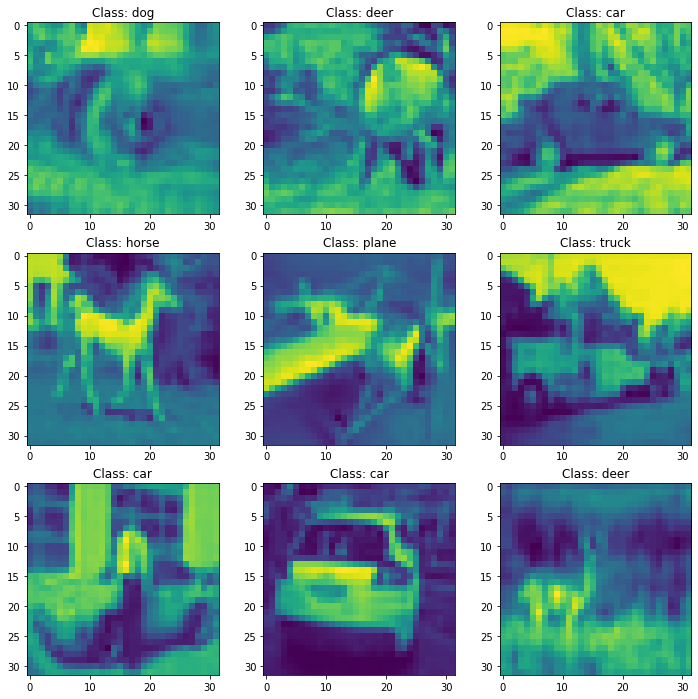

In [94]:
import matplotlib.pyplot as plt

batch_idx, (images, targets) = next(enumerate(train_loader))
print(f'current batch index is {batch_idx}')
print(f'images has shape {images.size()}')
print(f'targets has shape {targets.size()}')



fig, ax = plt.subplots(3,3)
fig.set_size_inches(12,12)
for i in range(3):
    for j in range(3):
        ax[i,j].imshow(images[i*3+j][0])
        ax[i,j].set_title(f'Class: {classes[targets[i*3+j]]}')
fig.show()

### Task 2: Create CNN and train it
Set up a convolutional neural network and have your data trained on it. You have to decide all the details in your network, overall your neural network should meet the following standards:


*   You should not use more than three convolutional layers and three fully connected layers
*   Accuracy on the test dataset should be **above** 50%



In [256]:
class OurCNN(nn.Module): # Any neural generated network should be generate

    def __init__(self):
        super(OurCNN, self).__init__()
         #[Conv2d, MaxPooling, ReLU] x num_conv_layers + FC x num_fc_layers
        self.conv = nn.Conv2d(3, 6, kernel_size=5)
        self.conv1 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc = nn.Linear(400, 200)
        self.fc1 = nn.Linear(200, 10)
        
    def forward(self, x):
        x = self.conv(x)       
        x = F.relu(F.max_pool2d(x,2))  

        x = self.conv1(x)       
        x = F.relu(F.max_pool2d(x,2))  

        x = x.view(-1, 400)      
        x = F.relu(self.fc(x))    
        x = F.relu(self.fc1(x))    

        return F.log_softmax(x,-1) 


In [257]:
def train(classifier, epoch):
    classifier.train() # we need to set the mode for our model

    for batch_idx, (images, targets) in enumerate(train_loader):

        optimizerCNN.zero_grad()
        output = classifier(images)
        loss = F.nll_loss(output, targets) # Here is a typical loss function (negative log likelihood)
        loss.backward()
        optimizerCNN.step()
        
        if batch_idx % 10 == 0: # We record our output every 10 batches
            train_losses.append(loss.item()) # item() is to get the value of the tensor directly
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
        if batch_idx % 100 == 0: # We visulize our output every 10 batches
            print(f'Epoch {epoch}: [{batch_idx*len(images)}/{len(train_loader.dataset)}] Loss: {loss.item()}')


def test(classifier, epoch):
    classifier.eval() # we need to set the mode for our model
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for images, targets in test_loader:
            output = classifier(images)
            test_loss += F.nll_loss(output, targets, reduction='sum').item()
            pred = output.data.max(1, keepdim=True)[1] # we get the estimate of our result by look at the largest class value
            correct += pred.eq(targets.data.view_as(pred)).sum() # sum up the corrected samples

            if(pred.eq(targets.data.view_as(pred)).shape[0]/2 > pred.eq(targets.data.view_as(pred)).sum()):
                _images.append(images)
                _targets.append(targets)
                _output.append(output)
  
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    test_counter.append(len(train_loader.dataset)*epoch)

    print(f'Test result on epoch {epoch}: Avg loss is {test_loss}, Accuracy: {100.*correct/len(test_loader.dataset)}%')

In [258]:
classifierCNN = OurCNN()

optimizerCNN = optim.SGD(classifierCNN.parameters(), lr=0.01, momentum=0.8)

train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 10

_images = []
_targets = []
_output = []

In [259]:
# ----------- <Your code> ---------------

for epoch in range(1, max_epoch+1):
    train(classifierCNN, epoch)
    test(classifierCNN, epoch)

Epoch 1: [0/50000] Loss: 2.304591178894043
Epoch 1: [6400/50000] Loss: 2.299072027206421
Epoch 1: [12800/50000] Loss: 2.202150821685791
Epoch 1: [19200/50000] Loss: 2.004896402359009
Epoch 1: [25600/50000] Loss: 1.9935545921325684
Epoch 1: [32000/50000] Loss: 1.9359965324401855
Epoch 1: [38400/50000] Loss: 1.9499627351760864
Epoch 1: [44800/50000] Loss: 1.948508620262146
Test result on epoch 1: Avg loss is 1.8709885620117188, Accuracy: 35.33000183105469%
Epoch 2: [0/50000] Loss: 1.9621700048446655
Epoch 2: [6400/50000] Loss: 1.7076371908187866
Epoch 2: [12800/50000] Loss: 1.5381193161010742
Epoch 2: [19200/50000] Loss: 1.8669624328613281
Epoch 2: [25600/50000] Loss: 1.6428872346878052
Epoch 2: [32000/50000] Loss: 1.3562284708023071
Epoch 2: [38400/50000] Loss: 1.3788524866104126
Epoch 2: [44800/50000] Loss: 1.6027708053588867
Test result on epoch 2: Avg loss is 1.429730908203125, Accuracy: 49.119998931884766%
Epoch 3: [0/50000] Loss: 1.281722068786621
Epoch 3: [6400/50000] Loss: 1.6269

Text(0.5, 1.0, 'Train and Test Likelihood Outcome over Training Period')

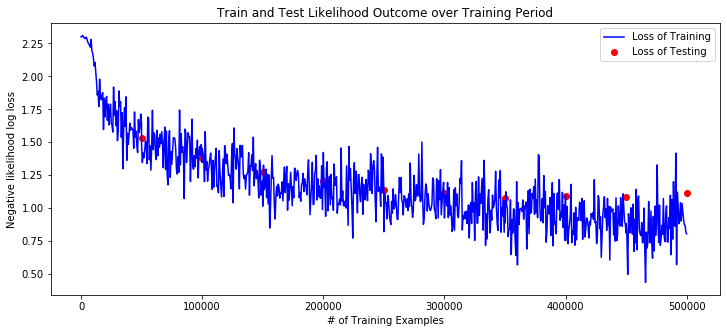

In [99]:
# ----------- <Your code> ---------------
fig = plt.figure(figsize=(12,5))
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Loss of Training', 'Loss of Testing'], loc='upper right')
plt.xlabel('# of Training Examples')
plt.ylabel('Negative likelihood log loss')
plt.title('Train and Test Likelihood Outcome over Training Period')

### Task 3: Plot misclassified test images
Plot some misclassified images in your test dataset:

*   select three images that are **misclassified** by your neural network
*   label each images with true label and predicted label



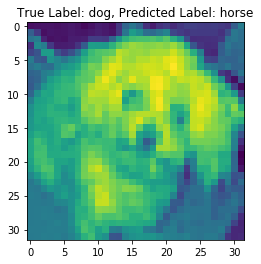

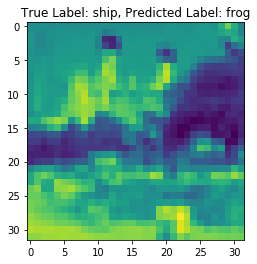

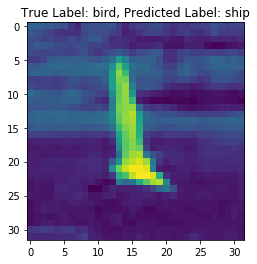

In [292]:
import math

for i in range(3):    
    plt.imshow(_images[i*3+1][0][0])
    plt.title(f'True Label: {classes[_targets[i*3+1][0]]}, Predicted Label: {classes[math.floor(_output[i*3+1][0][0])]}')
    plt.show()


Questions (0 points): Are the mis-classified images also misleading to human eyes?

## Exercise 3: Transfer Learning (30 points)

In practice, people won't train an entire CNN from scratch, because it is relatively rare to have a dataset of sufficient size (or sufficient computational power). Instead, it is common to pretrain a CNN on a very large dataset and then use the CNN either as an initialization or a fixed feature extractor for the task of interest.

In this task, you will learn how to use a pretrained CNN for CIFAR-10 classification.

### Task1: Load pretrained model

`torchvision.models` (https://pytorch.org/vision/stable/models.html) contains definitions of models for addressing different tasks, including: image classification, pixelwise semantic segmentation, object detection, instance segmentation, person keypoint detection and video classification.

First, you should load the **pretrained** ResNet-18 that has already been trained on [ImageNet](https://www.image-net.org/) using `torchvision.models`. If you are interested in more details about Resnet-18, read this paper https://arxiv.org/pdf/1512.03385.pdf.

In [306]:
# ----------- <Your code> ---------------
import torchvision.models as models

resnetClassifier = torchvision.models.resnet18(pretrained=True)


### Task2: Create data loaders for CIFAR-10

Then you need to create a dataloader of CIFAR-10. Note that the model you load has been trained on **ImageNet** and it expects inputs as mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be **at least** 224. So you need to preprocess the CIFAR-10 data to make sure it has a height and width. See [`torchvision.transforms.Resize`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Resize).
You will probably want to add this transform appropriately to the `transform` you created in a previous task.


In [307]:
# ----------- <Your code> ---------------

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                    torchvision.transforms.Resize(224),
                      torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


train_dataset = torchvision.datasets.CIFAR10('D:\Jupyter\ECE570\Assignment-4', train=True,
                                             download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10('D:\Jupyter\ECE570\Assignment-4', train=False,
                                            download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


batch_size_train, batch_size_test = 64, 1000
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True) # 64 images per batch
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size_test, shuffle=False) # 64 images per batch 

print(test_loader)


Files already downloaded and verified
Files already downloaded and verified


### Task3: Classify test data on pretrained model

Use the model you load to classify the **test** CIFAR-10 data and print out the test accuracy.

Don't be surprised if the accuracy is bad!

In [308]:
# ----------- <Your code> ---------------
def train(classifier, epoch):
    classifier.train() # we need to set the mode for our model

    for batch_idx, (images, targets) in enumerate(train_loader):


        #optimizerResnet.Zero_grad()
        output = classifier(images)
        loss = F.nll_loss(output, targets) # Here is a typical loss function (negative log likelihood)
        loss.backward()
        optimizerResnet.step()

        
        if batch_idx % 10 == 0: # We record our output every 10 batches
            train_losses.append(loss.item()) # item() is to get the value of the tensor directly
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
        if batch_idx % 100 == 0: # We visulize our output every 10 batches
            print(f'Epoch {epoch}: [{batch_idx*len(images)}/{len(train_loader.dataset)}] Loss: {loss.item()}')

def test(classifier, epoch):
    classifier.eval() # we need to set the mode for our model
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for images, targets in test_loader:
            output = classifier(images)
            
            test_loss += F.nll_loss(output, targets, reduction='sum').item()
            pred = output.data.max(1, keepdim=True)[1] # we get the estimate of our result by look at the largest class value
            
            correct += pred.eq(targets.data.view_as(pred)).sum() # sum up the corrected samples
  
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    test_counter.append(len(train_loader.dataset)*epoch)
    print(pred)
    print(f'Test result on epoch {epoch}: Avg loss is {test_loss}, Accuracy: {100.*correct/len(test_loader.dataset)}%')



In [309]:

train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 2

for epoch in range(1, max_epoch+1):
    test(resnetClassifier, epoch)

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:79] data. DefaultCPUAllocator: not enough memory: you tried to allocate 3211264000 bytes.

### Task 4: Update model for CIFAR-10

Now try to improve the test accuracy. We offer several possible solutions:

(1) You can try to directly continue to train the model you load with the CIFAR-10 training data. 

(2) For efficiency, you can try to freeze part of the parameters of the loaded models. For example, you can first freeze all parameters by

```
for param in model.parameters():
    param.requires_grad = False
```
and then unfreeze the last few layers by setting `somelayer.requires_grad=True`.

You are also welcome to try any other approach you can think of.


**Note:** You should print out the test accuracy and to get full credits, the test accuracy should be at least **80%**.

In [310]:
ct = 0
for child in resnetClassifier.children():
    ct += 1
    if ct < 9:
        for param in child.parameters():
            param.requires_grad = False
    


In [311]:
# ----------- <Your code> ---------------

#for param in resnetClassifier.parameters():
#    param.requires_grad = False

train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 2
ct = 0

#for param in resnetClassifier.parameters():
#    if count > 60:
#        param.requires_grad=True
#    count = count + 1

optimizerResnet = optim.SGD(resnetClassifier.parameters(), lr=0.01, momentum=0.8)

for epoch in range(1, max_epoch+1):
    train(resnetClassifier, epoch)
    test(resnetClassifier, epoch)
    
# Unfreaze the last 12 paramaters
#for param in resnetClassifier.parameters():
 #   if count > 40:
  #      param.requires_grad=True
  #  count = count + 1

#print("\nTest Again\n")
#for epoch in range(1, max_epoch+1):
 #   test(resnetClassifier, epoch)


Epoch 1: [0/50000] Loss: 0.5770672559738159
Epoch 1: [6400/50000] Loss: -10031.7314453125
Epoch 1: [12800/50000] Loss: -41386.87890625
Epoch 1: [19200/50000] Loss: -94123.03125
Epoch 1: [25600/50000] Loss: -168146.703125
Epoch 1: [32000/50000] Loss: -260418.0
Epoch 1: [38400/50000] Loss: -382227.15625
Epoch 1: [44800/50000] Loss: -512422.9375


RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:79] data. DefaultCPUAllocator: not enough memory: you tried to allocate 3211264000 bytes.